# Objective:

<p>
    <span style='font-family:Arial'>
    Identify fraudulent credit card transactions using CNN
    </span>
</p> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
print("Fraud")
print(df.Time[df.Class==1].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [9]:
print("Not Fraud")
print(df.Time[df.Class==0].describe())

Not Fraud
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


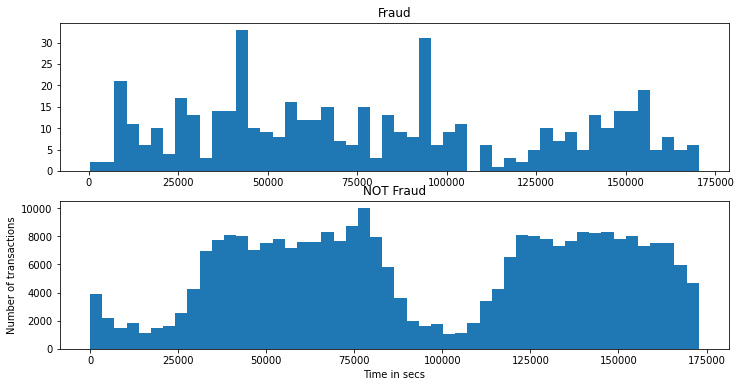

In [10]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
ax1.hist(df.Time[df.Class==1],bins=50)
ax1.set_title("Fraud")
ax2.hist(df.Time[df.Class==0],bins=50)
ax2.set_title("NOT Fraud")
plt.xlabel('Time in secs')
plt.ylabel('Number of transactions')
plt.show()

In [11]:
print("Fraud")
print(df.Amount[df.Class==1].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [12]:
print("Fraud")
print(df.Amount[df.Class==0].describe())

Fraud
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


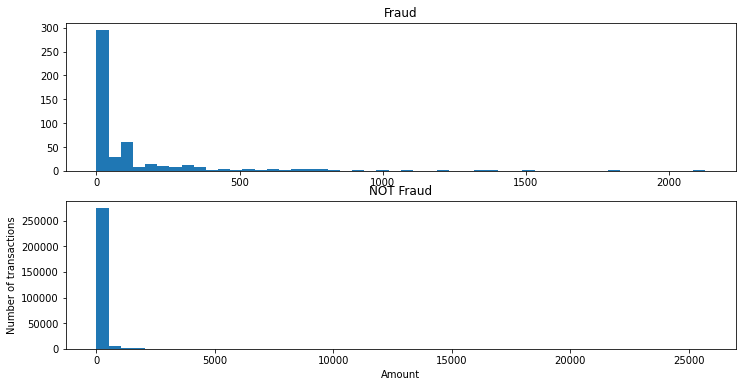

In [13]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
ax1.hist(df.Amount[df.Class==1],bins=50)
ax1.set_title("Fraud")
ax2.hist(df.Amount[df.Class==0],bins=50)
ax2.set_title("NOT Fraud")
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.show()

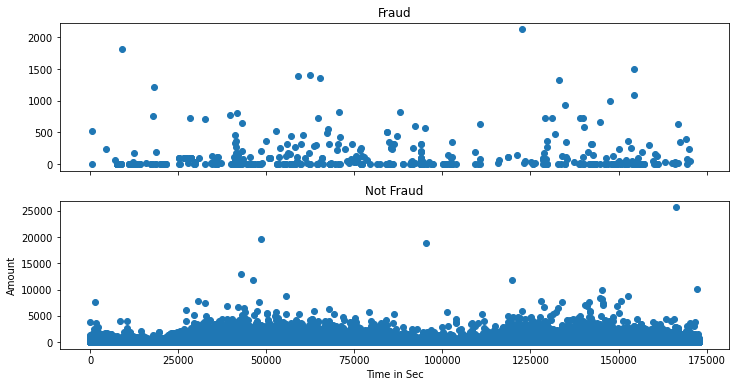

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))
ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')
ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Not Fraud')
plt.xlabel('Time in Sec')
plt.ylabel('Amount')
plt.show()

In [15]:
X = df.iloc[:, :-1].values
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

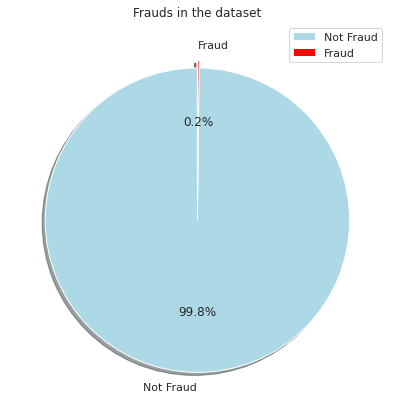

In [16]:
sns.set(style="whitegrid")
labels = ['Not Fraud', 'Fraud']
sizes = df['Class'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Frauds in the dataset')
plt.legend()
plt.show()

## Distribution Plot

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

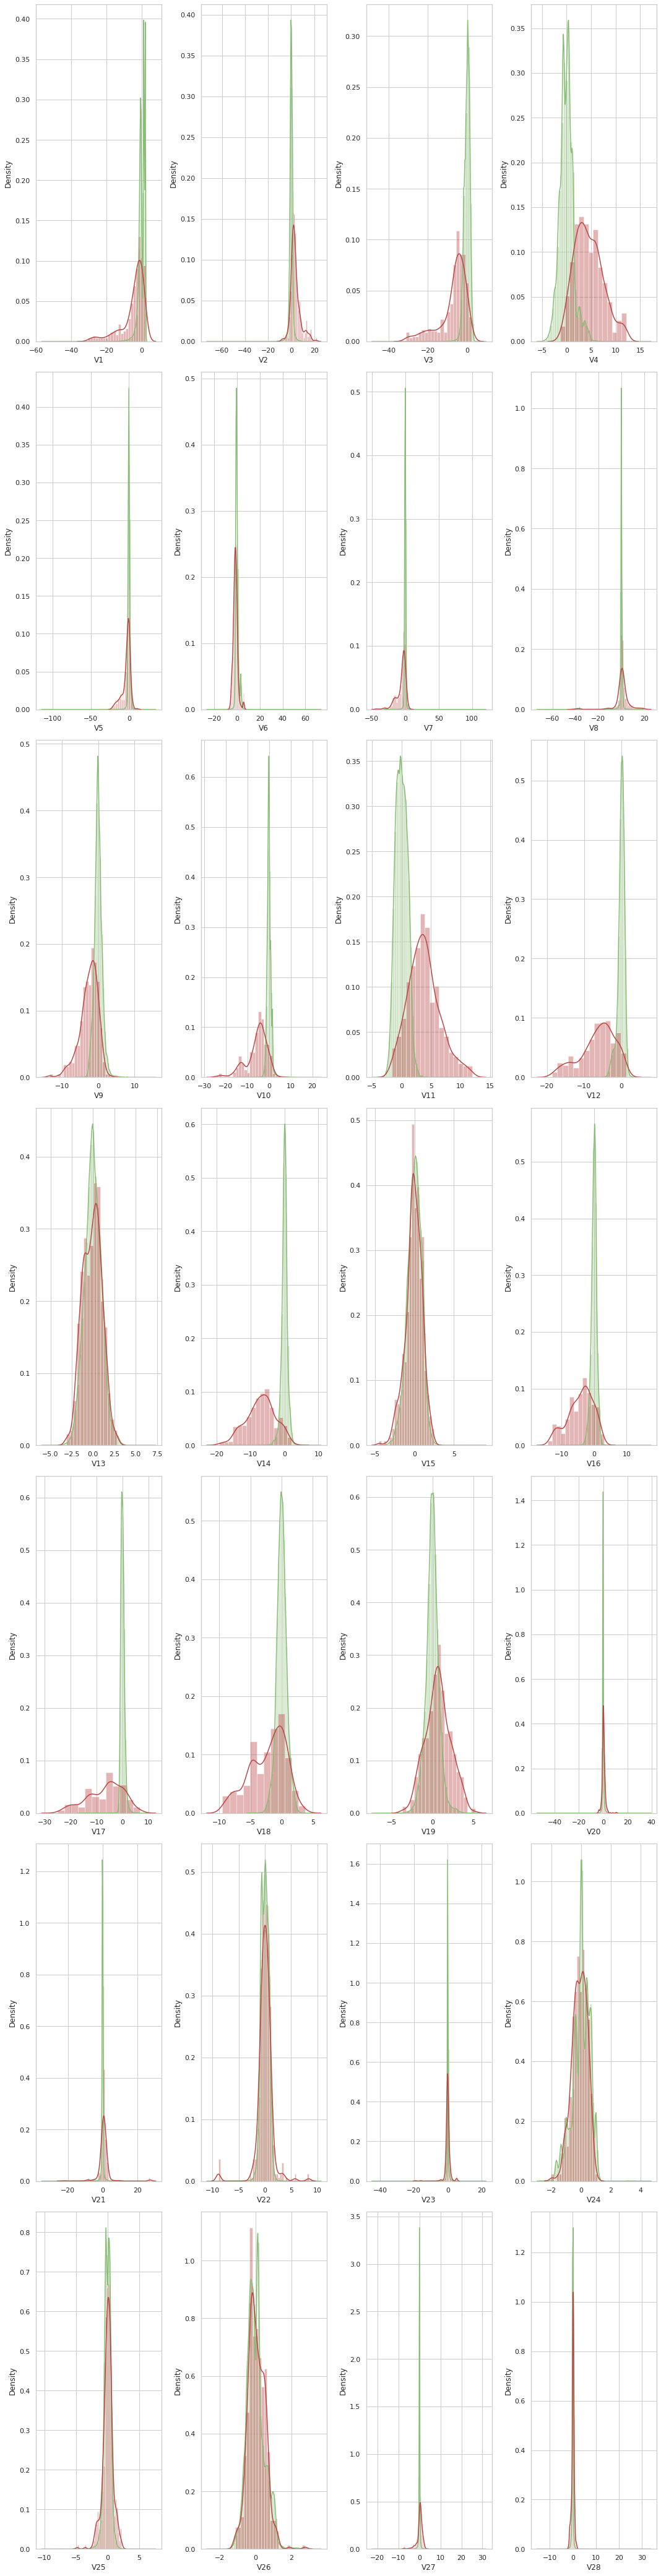

In [17]:
V = df[[col for col in df.columns if 'V' in col]+['Class']]

f, ax = plt.subplots(ncols = 4, nrows = 7, figsize=(15,2*len(V.columns)))

for i, c in zip(ax.flatten(), V.columns):
    sns.distplot(V[c][V['Class'] == 0],color='#87bd75', ax = i) #Genuine
    sns.distplot(V[c][V['Class'] == 1],color='#b94646', ax = i) #Fraud   
f.tight_layout()

## Genuine/Fraud by Time Elapsed

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


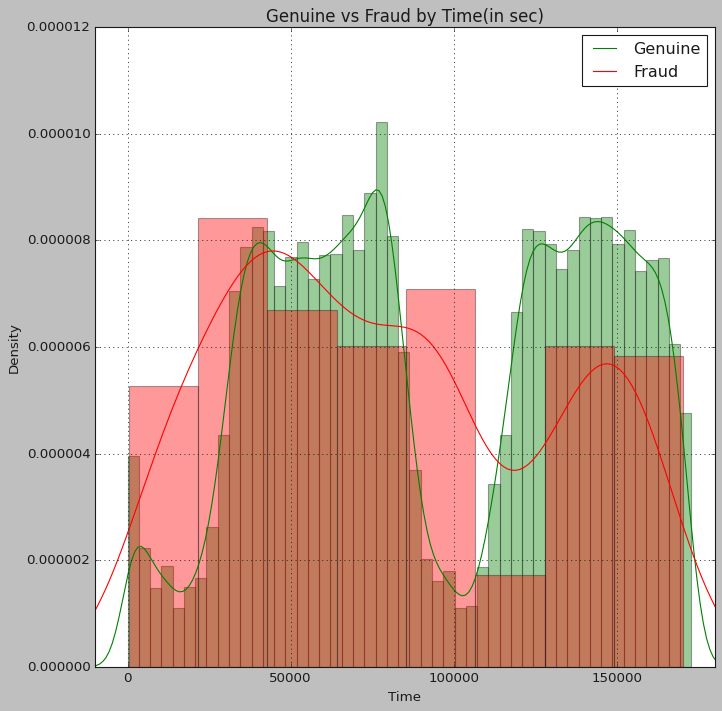

In [18]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(df[df['Class'] == 0]["Time"], color='green') # Genuine - green
sns.distplot(df[df['Class'] == 1]["Time"], color='red') # Fraud - Red

plt.title('Genuine vs Fraud by Time(in sec)', fontsize=15)
plt.xlim([-10000,180000])
plt.grid(linewidth = 0.7)
plt.legend(['Genuine','Fraud'])
plt.show()

## Genuine/Fraud by Amount

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


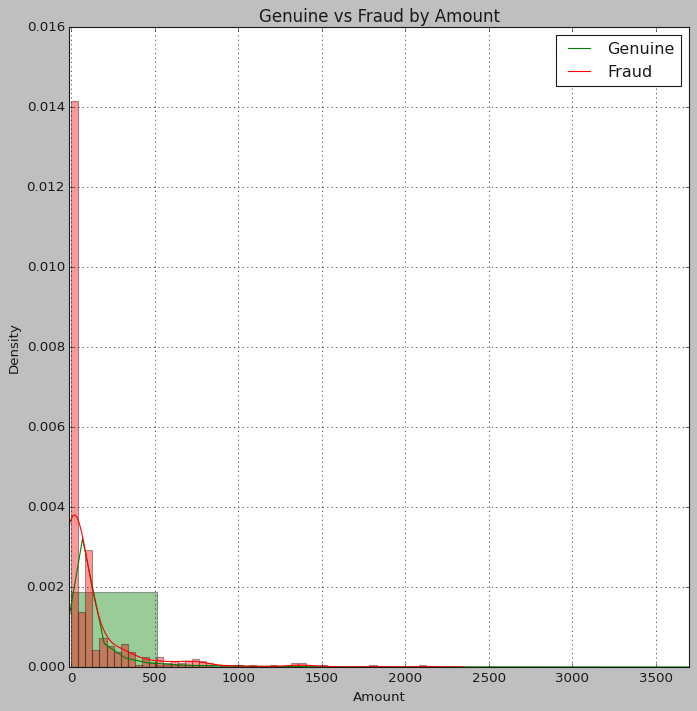

In [19]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(df[df['Class'] == 0]["Amount"], color='green') # Genuine - green
sns.distplot(df[df['Class'] == 1]["Amount"], color='red') # Fraud - Red

plt.title('Genuine vs Fraud by Amount', fontsize=15)
plt.xlim([-10,3700])
plt.grid(linewidth = 0.7)
plt.legend(['Genuine','Fraud'])
plt.show()

In [20]:
X.shape


(284807, 30)

In [21]:
y = df['Class'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
y.shape

(284807,)

In [23]:
# divide into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [24]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
# use CNN for classification
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6,  activation='relu'))
model.add(tf.keras.layers.Dense(6,  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
5964/5964 [==============================] - 12s 2ms/step - loss: 0.2818 - accuracy: 0.9640
Epoch 2/5
5964/5964 [==============================] - 11s 2ms/step - loss: 0.0088 - accuracy: 0.9985
Epoch 3/5
5964/5964 [==============================] - 11s 2ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 4/5
5964/5964 [==============================] - 11s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 5/5
5964/5964 [==============================] - 11s 2ms/step - loss: 0.0031 - accuracy: 0.9994


In [26]:
model.evaluate(X_test,y_test)

2938/2938 [==============================] - 4s 1ms/step - loss: 0.0038 - accuracy: 0.9993


[0.0037936086300760508, 0.9993403553962708]

In [27]:
predictions=model.predict(X_test)

In [28]:
dataframe=pd.DataFrame(y_test, columns=['prediction']) 

In [29]:
dataframe.nunique()

prediction    2
dtype: int64

In [30]:
dataframe.value_counts()

prediction
0             93803
1               184
dtype: int64

In [31]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[93784    19]
 [   43   141]]


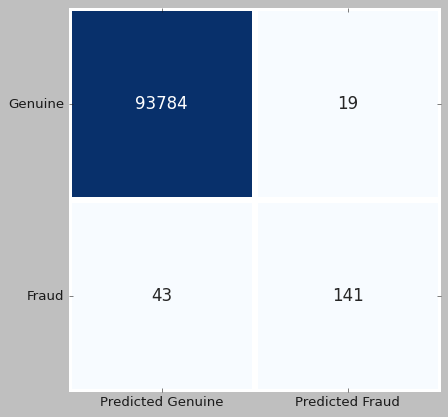

In [32]:
# visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Genuine', 'Fraud'], xticklabels = ['Predicted Genuine', 'Predicted Fraud'])
plt.yticks(rotation = 0)
plt.show()

In [33]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.9993403343015523
